A partir del dataset mnist (tf.keras.datasets.mnist.load_data()), realiza una clasificación usando:

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

¿ Cuál ha dado mejor resultado?

Para compilar el modelo, usa:

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
ds_mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = ds_mnist.load_data()

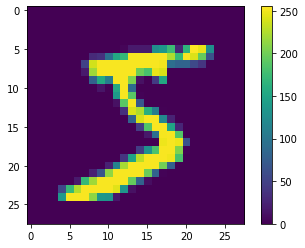

In [3]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [5]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

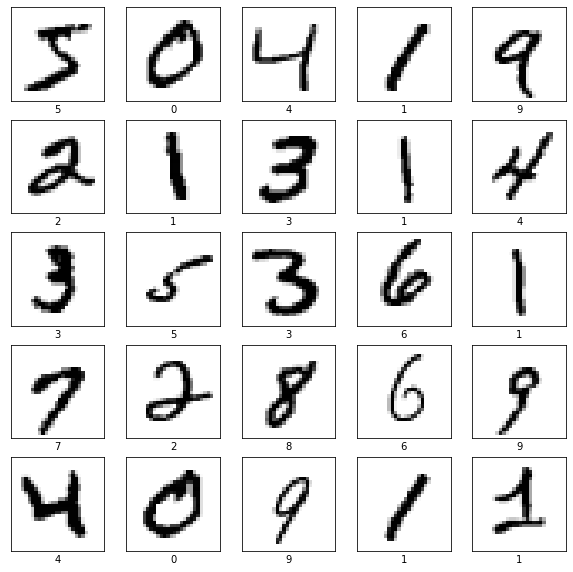

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

In [9]:
model = keras.Sequential([
    keras.layers.Conv2D(8, (3, 3), padding="valid",strides=(1,1), input_shape=(28, 28, 1),activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10,activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1352)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                43296     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 43,706
Trainable params: 43,706
Non-trainable params: 0
____________________________________________________

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3346 - accuracy: 0.9005
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1461 - accuracy: 0.9559
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1060 - accuracy: 0.9682
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0864 - accuracy: 0.9728
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0746 - accuracy: 0.9770
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0647 - accuracy: 0.9801
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0589 - accuracy: 0.9810
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0534 - accuracy: 0.9833
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0488 - accuracy: 0.9847
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('Test accuracy:', test_acc)

313/313 - 1s - loss: 0.0463 - accuracy: 0.9859

Test accuracy: 0.9858999848365784


In [13]:
predictions = model.predict(test_images)

In [14]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

NameError: name 'plot_image' is not defined

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

In [26]:
model2 = keras.Sequential([
    keras.layers.Conv2D(8, (3, 3), padding="valid",strides=(1,1), input_shape=(28, 28, 1),activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10,activation="softmax")
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 8)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1352)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                43296     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 43,706
Trainable params: 43,706
Non-trainable params: 0
__________________________________________________

In [27]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
model2.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3682 - accuracy: 0.8884
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1575 - accuracy: 0.9530
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1218 - accuracy: 0.9622
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0996 - accuracy: 0.9688
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0853 - accuracy: 0.9737
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0771 - accuracy: 0.9762
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0678 - accuracy: 0.9781
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0617 - accuracy: 0.9806
Epoch 9/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0588 - accuracy: 0.9814
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - los

In [29]:
test_loss, test_acc = model2.evaluate(test_images,  test_labels, verbose=2)

print('Test accuracy:', test_acc)

313/313 - 1s - loss: 0.0459 - accuracy: 0.9859

Test accuracy: 0.9858999848365784


In [31]:
predictions = model2.predict(test_images)

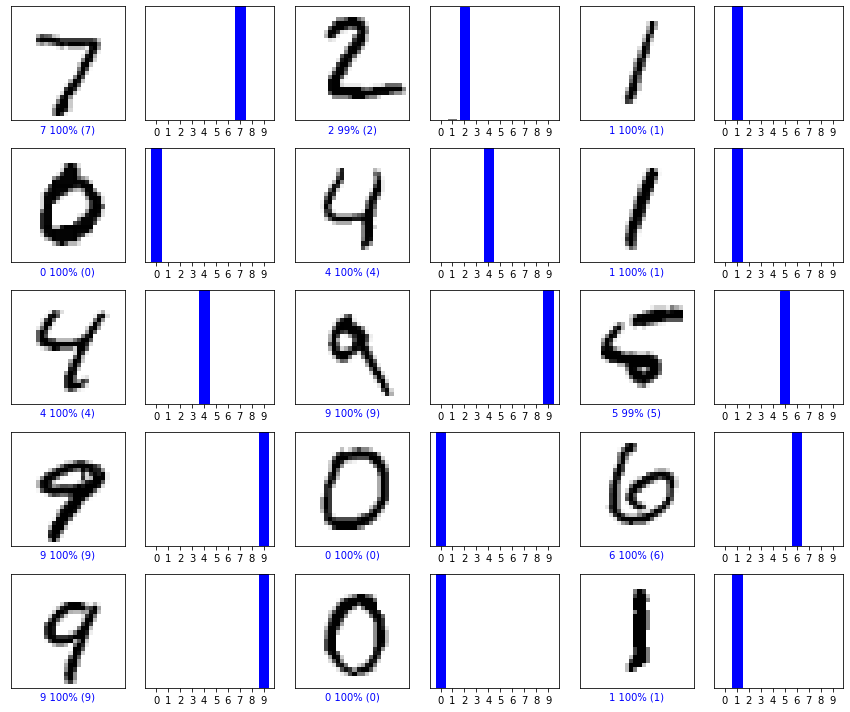

In [32]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()